Analysing the life of Australian Possums

In [66]:
#Import all the Libraries which are required for this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max.columns', 500)

In [67]:
#import the dataset
df = pd.read_csv(r'possum.csv')
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


# Expolatory Data Anslysis

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [69]:
#check the missing in all features
missing_features = [feature for feature in df.columns if df[feature].isnull().any()]
for feature in missing_features:
    print(feature," is having",np.round(df[feature].isnull().mean(),4)*100,"% of null value")  
    if df[feature].isnull().sum()==0:
        print(feature,"All feature doesn't have null values of null value")
    


age  is having 1.92 % of null value
footlgth  is having 0.96 % of null value


In [70]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [71]:
df['Pop'].unique()

array(['Vic', 'other'], dtype=object)

In [72]:
#Droping null value from the dataset because it contain around 2% null value in total
data = df.copy()
data.dropna(axis=0,inplace=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


Clean the data

In [74]:
data =data.drop(labels=['case'],axis=1)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      101 non-null    int64  
 1   Pop       101 non-null    object 
 2   sex       101 non-null    object 
 3   age       101 non-null    float64
 4   hdlngth   101 non-null    float64
 5   skullw    101 non-null    float64
 6   totlngth  101 non-null    float64
 7   taill     101 non-null    float64
 8   footlgth  101 non-null    float64
 9   earconch  101 non-null    float64
 10  eye       101 non-null    float64
 11  chest     101 non-null    float64
 12  belly     101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.0+ KB


In [76]:
#rename coulmn name for better readability
data = data.rename(columns={'Pop': 'population area','site':'site of recording'})

In [77]:
data

,site of recording,population area,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [78]:
#Rename the Gender male and Female
data = data.replace({'m':"male","f":"female"})

In [79]:
data

,site of recording,population area,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,male,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,female,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,female,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,female,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,female,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,male,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,male,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,female,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,male,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [80]:
data['site of recording'] = data['site of recording'].astype(str)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site of recording  101 non-null    object 
 1   population area    101 non-null    object 
 2   sex                101 non-null    object 
 3   age                101 non-null    float64
 4   hdlngth            101 non-null    float64
 5   skullw             101 non-null    float64
 6   totlngth           101 non-null    float64
 7   taill              101 non-null    float64
 8   footlgth           101 non-null    float64
 9   earconch           101 non-null    float64
 10  eye                101 non-null    float64
 11  chest              101 non-null    float64
 12  belly              101 non-null    float64
dtypes: float64(10), object(3)
memory usage: 11.0+ KB


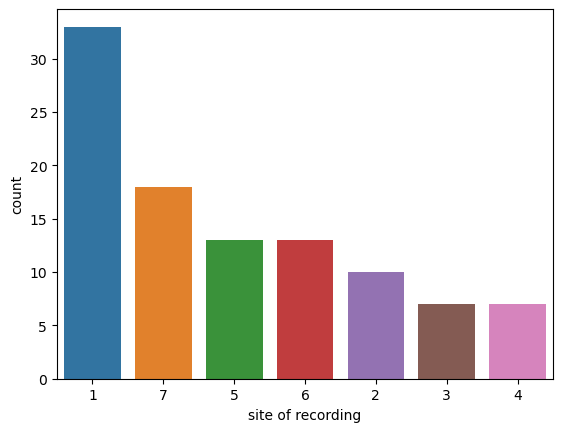

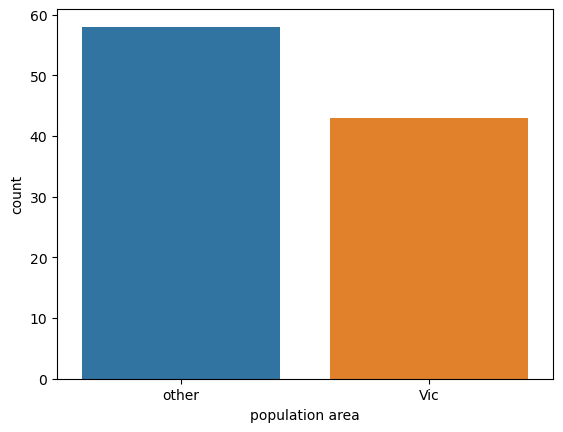

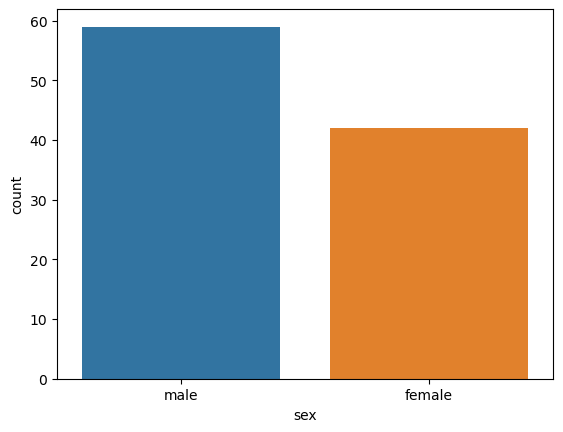

In [82]:
#let the plot the categorical Variable
categorical_feature= [feature for feature in data.columns if data[feature].dtype=="O"]
for feature in categorical_feature:
    sns.countplot(x=feature,data=data,order=data[feature].value_counts().index)
    plt.show()
             

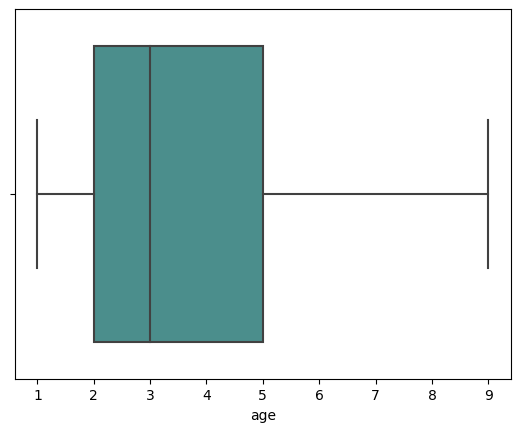

<Figure size 600x650 with 0 Axes>

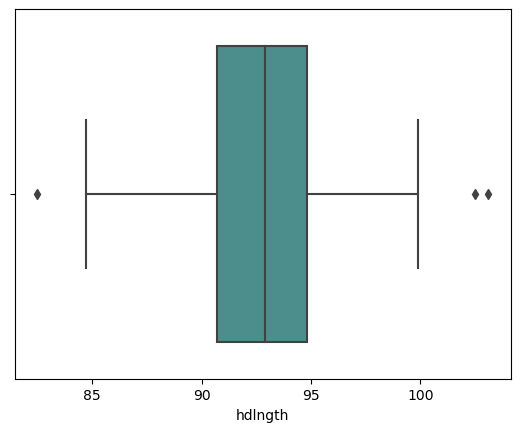

<Figure size 600x650 with 0 Axes>

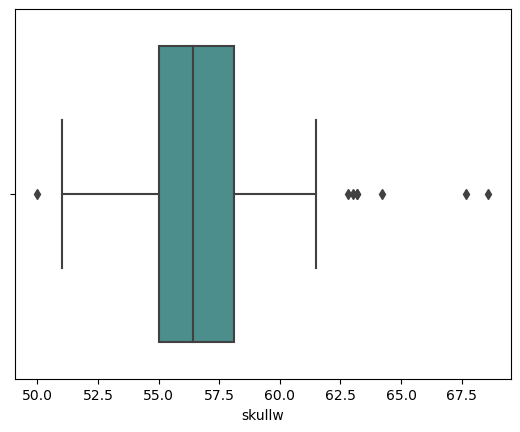

<Figure size 600x650 with 0 Axes>

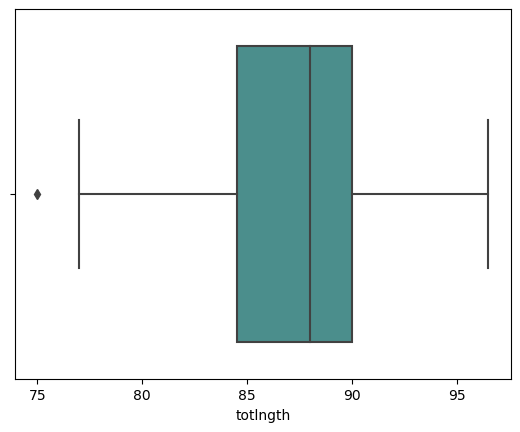

<Figure size 600x650 with 0 Axes>

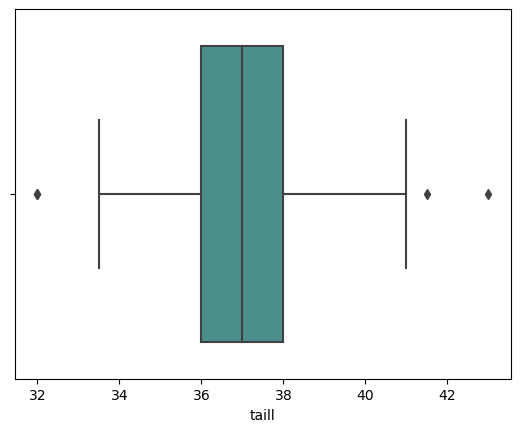

<Figure size 600x650 with 0 Axes>

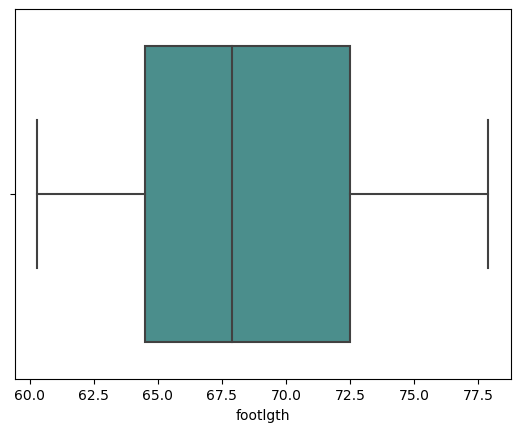

<Figure size 600x650 with 0 Axes>

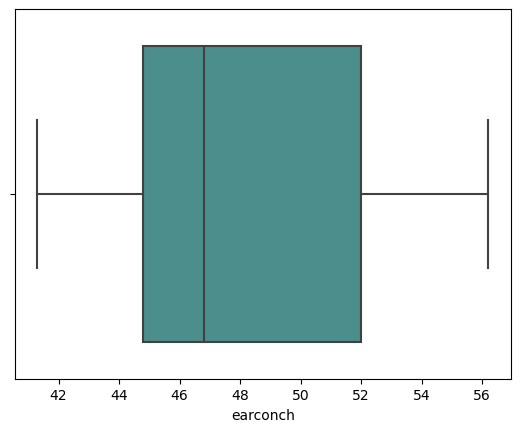

<Figure size 600x650 with 0 Axes>

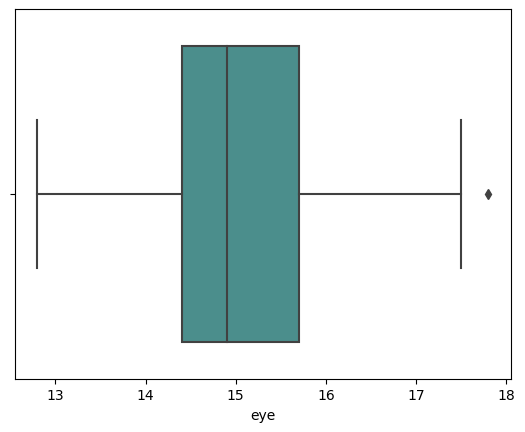

<Figure size 600x650 with 0 Axes>

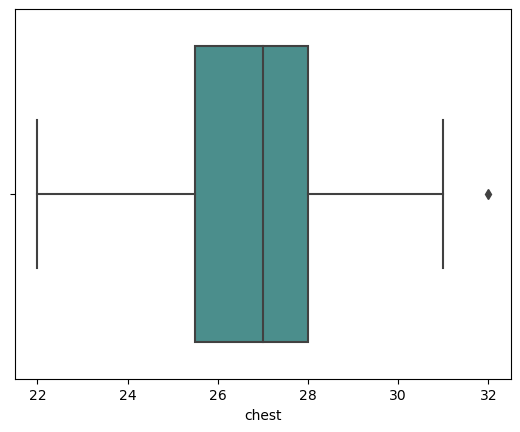

<Figure size 600x650 with 0 Axes>

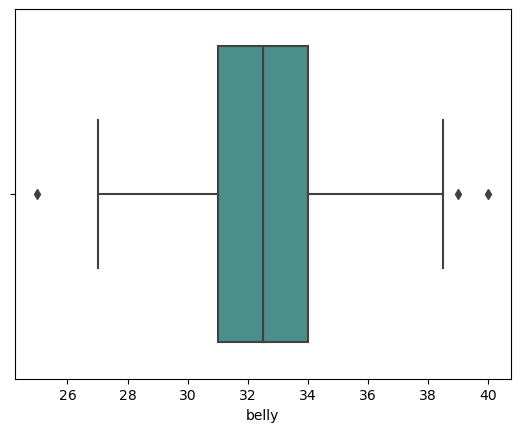

<Figure size 600x650 with 0 Axes>

In [83]:
#let the plot the numerical Variable
numerical_feature= [feature for feature in data.columns if data[feature].dtype!="O"]
for feature in numerical_feature:
    sns.boxplot(x=feature,data=data,color='#409996')
    plt.figure(figsize=(6,6.5))
    plt.show()

<AxesSubplot:>

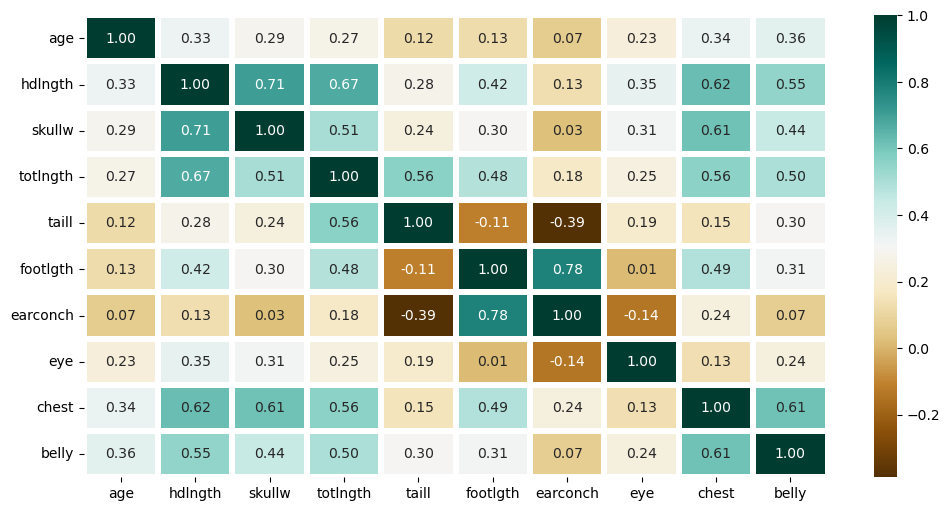

In [84]:
corr=data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot = True,linewidths = 4,fmt = ".2f",cmap="BrBG")

In [85]:
from scipy.stats import pearsonr

In [86]:
data.cov()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
age,3.667921,2.220525,1.696871,2.156475,0.453911,1.066644,0.515059,0.470089,1.296584,1.884950
hdlngth,2.220525,12.381349,7.706628,9.900051,1.908965,6.459561,1.879856,1.321235,4.416005,5.235203
skullw,1.696871,7.706628,9.626616,6.593772,1.474480,4.069721,0.318647,1.032420,3.848574,3.759545
totlngth,2.156475,9.900051,6.593772,17.613149,4.663535,8.949639,3.088244,1.098065,4.715995,5.730297
taill,0.453911,1.908965,1.474480,4.663535,3.887525,-0.996901,-3.105183,0.401475,0.609282,1.593069
footlgth,1.066644,6.459561,4.069721,8.949639,-0.996901,19.478996,14.021167,0.064801,4.338629,3.755777
earconch,0.515059,1.879856,0.318647,3.088244,-3.105183,14.021167,16.486455,-0.618417,1.980312,0.789787
eye,0.470089,1.321235,1.032420,1.098065,0.401475,0.064801,-0.618417,1.120725,0.288218,0.701431
chest,1.296584,4.416005,3.848574,4.715995,0.609282,4.338629,1.980312,0.288218,4.083317,3.360990
belly,1.884950,5.235203,3.759545,5.730297,1.593069,3.755777,0.789787,0.701431,3.360990,7.440594


In [87]:
corr,PValue =pearsonr(data['footlgth'], data['earconch'])

In [88]:
corr

0.7824151314834624

In [89]:
PValue 

4.410254964468967e-22

footlgth and earconch are strongly correalted(positvely) with each other

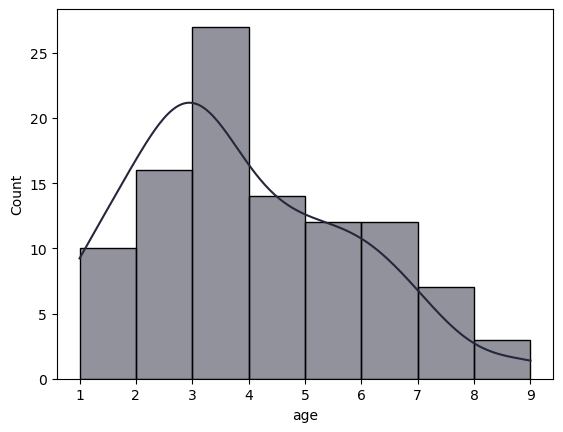

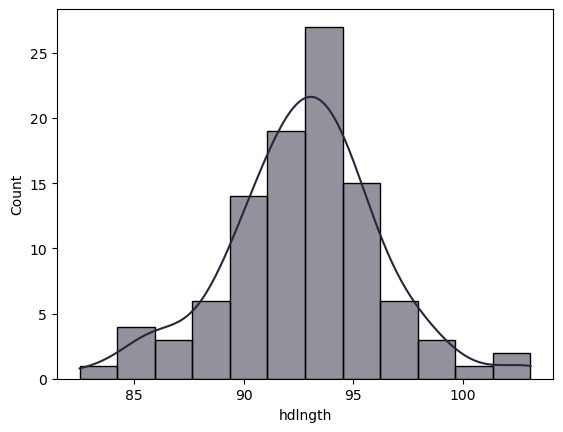

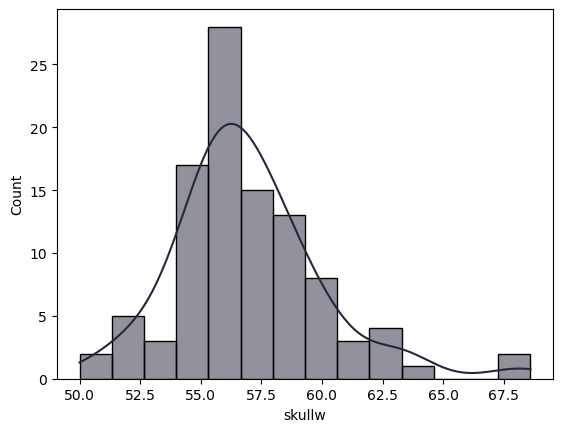

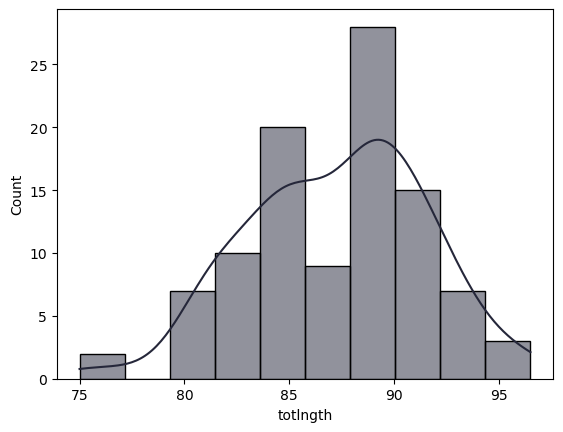

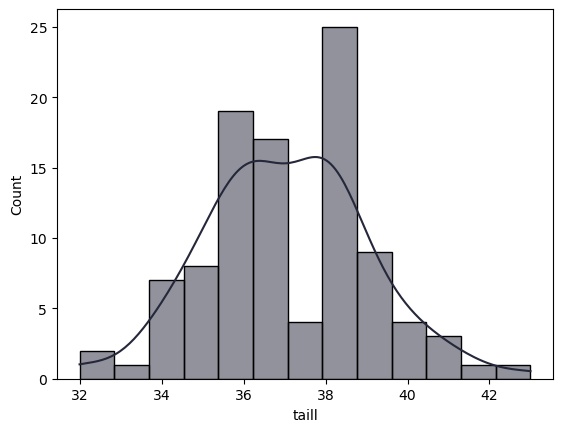

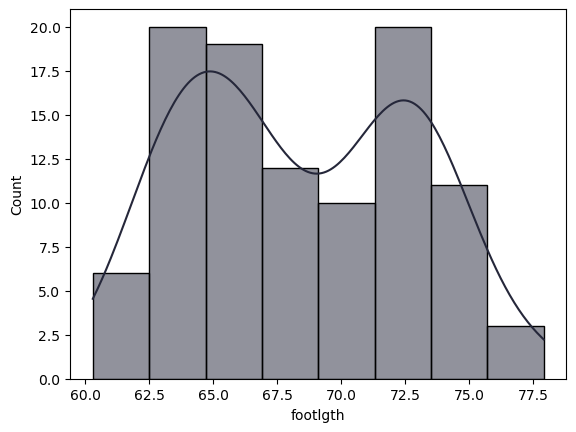

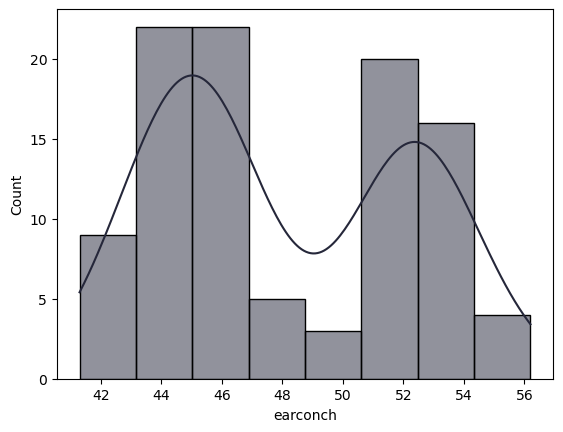

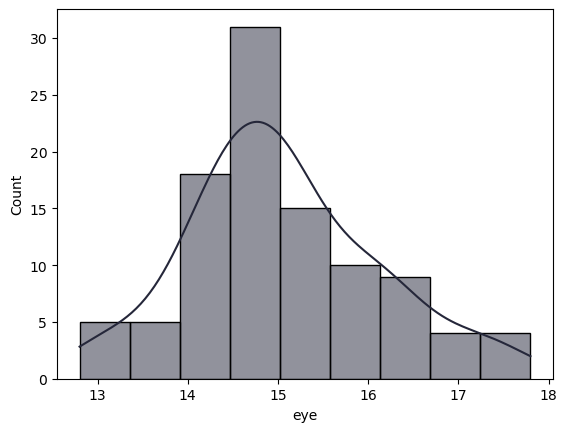

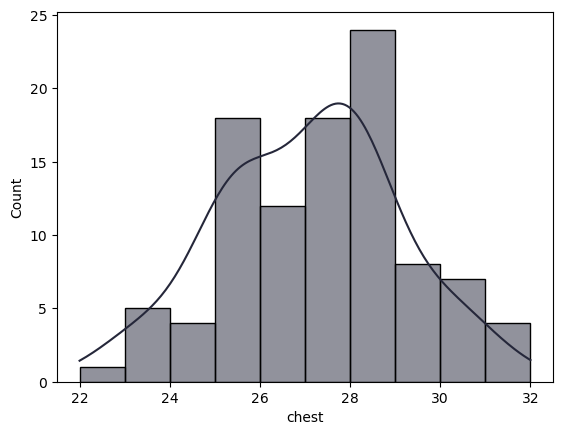

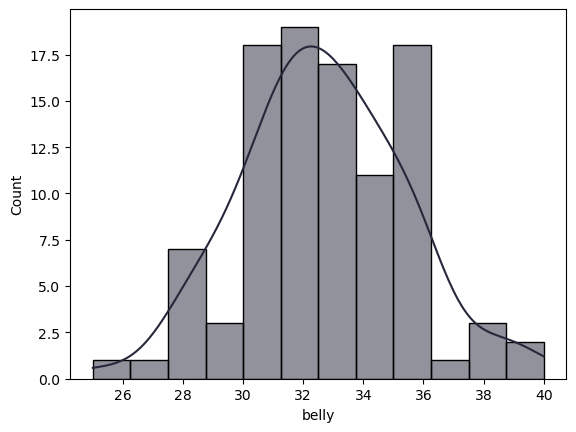

In [90]:
#Analyse the numercial feature
numercial_feature = [feature for feature in data.columns if data[feature].dtypes!='O']
for feature in numercial_feature:
    sns.histplot(x=feature,data=data,kde=True,color='#25273A')
    plt.show()

In [91]:
for feature in numercial_feature:
    Skewness=data[feature].skew()
    Kurtosis =data[feature].kurtosis()
    print("Skewness and kurtosis of {} is {} and {}".format(feature,Skewness,Kurtosis))

Skewness and kurtosis of age is 0.5557636855280296 and -0.2722766600481439
Skewness and kurtosis of hdlngth is -0.05493581779741441 and 1.034452958722866
Skewness and kurtosis of skullw is 1.032010738590737 and 2.5198122813798505
Skewness and kurtosis of totlngth is -0.2488556532210192 and -0.1619606976561152
Skewness and kurtosis of taill is 0.12345275581541876 and 0.3892246475333012
Skewness and kurtosis of footlgth is 0.12476328967100807 and -1.1950662146812054
Skewness and kurtosis of earconch is 0.21838450054683675 and -1.3886814614669465
Skewness and kurtosis of eye is 0.38208483183010794 and 0.03755245778755212
Skewness and kurtosis of chest is -0.058406372844292946 and -0.23544860034826698
Skewness and kurtosis of belly is 0.10584530513967681 and 0.23789366042558635


features are having platkurtic kurtosis,have flatter distribution of data. Only two features are left skewed hdlngth and chest

In [92]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [93]:
#Convert data into Guassian distribution in order to apply Linear Regression

In [94]:
data['skullw'] = boxcox(data['skullw'])[0]

In [95]:
data['skullw']

0      0.292697
1      0.292697
2      0.292697
3      0.292697
4      0.292697
         ...   
99     0.292697
100    0.292697
101    0.292697
102    0.292697
103    0.292697
Name: skullw, Length: 101, dtype: float64

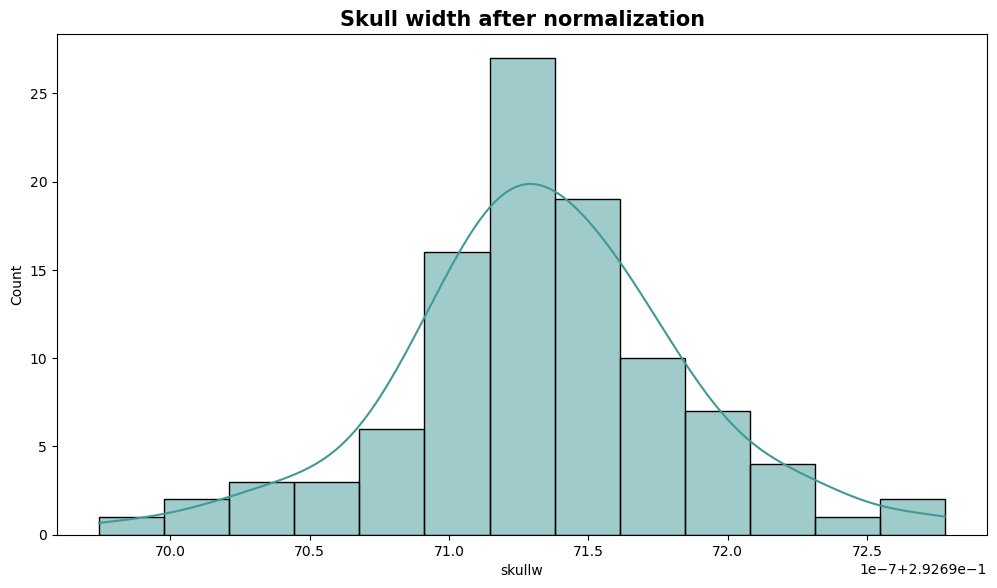

In [96]:
plt.figure(figsize=(12,6.5)) 
plt.title('Skull width after normalization', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
sns.histplot(data=data, x="skullw", kde=True, color='#409996')
plt.show()

In [97]:
from sklearn import preprocessing

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [99]:
data

,site of recording,population area,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,male,8.0,94.1,0.292697,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,female,6.0,92.5,0.292697,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,female,6.0,94.0,0.292697,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,female,6.0,93.2,0.292697,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,female,2.0,91.5,0.292697,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,male,1.0,89.5,0.292697,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,male,1.0,88.6,0.292697,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,female,6.0,92.4,0.292697,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,male,4.0,91.5,0.292697,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [100]:
data.columns

Index(['site of recording', 'population area', 'sex', 'age', 'hdlngth',
       'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest',
       'belly'],
      dtype='object')

In [101]:
#Convert the categorical feature into numerical feature

In [102]:
data['population area'].value_counts()

other    58
Vic      43
Name: population area, dtype: int64

In [103]:
label_encoder = preprocessing.LabelEncoder()

In [104]:
data['population area'] = label_encoder.fit_transform(data['population area'])

In [105]:
data['population area']

0      0
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    1
102    1
103    1
Name: population area, Length: 101, dtype: int32

In [106]:
data['sex'] = data['sex'].replace({'male': 1,'female':0})

In [107]:
#Split the independent and dependent varibale
X= data.loc[:,['site of recording', 'population area', 'sex','hdlngth',
       'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest',
       'belly']]

In [108]:
X

,site of recording,population area,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,94.1,0.292697,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,92.5,0.292697,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,94.0,0.292697,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,93.2,0.292697,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,91.5,0.292697,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,1,1,89.5,0.292697,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,1,1,88.6,0.292697,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,1,0,92.4,0.292697,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,1,1,91.5,0.292697,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [109]:
y=data['age']

In [110]:
#Split the train and test for model building
from sklearn.model_selection import train_test_split


In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [112]:
X_train

,site of recording,population area,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
94,7,1,1,91.6,0.292697,88.5,37.5,64.5,45.4,14.9,27.0,31.0
67,5,1,1,94.1,0.292697,88.5,38.0,65.9,43.1,17.4,27.0,30.0
28,1,0,0,92.8,0.292697,88.0,35.0,74.9,51.8,14.0,24.0,32.0
86,7,1,1,98.5,0.292697,93.0,41.5,71.7,46.8,15.0,26.0,36.0
5,1,0,0,93.1,0.292697,90.5,35.5,73.2,53.6,14.2,30.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63,5,1,0,96.9,0.292697,89.5,38.5,63.0,45.1,17.1,25.5,33.0
74,6,1,1,93.8,0.292697,89.0,38.0,66.2,45.6,16.9,26.0,33.5
14,1,0,1,92.9,0.292697,85.5,34.0,69.7,51.8,15.7,28.0,35.0
95,7,1,1,94.8,0.292697,83.0,38.0,66.5,47.7,14.0,25.0,33.0


In [113]:
#Using Standard Scaler to make the data points on a similar scale
scaler = preprocessing.StandardScaler()

In [114]:
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [118]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [133]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [134]:
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
y_pred = lr.predict(X_test)

In [136]:
y_pred

array([4.27049314, 3.22996381, 2.83739096, 4.20017826, 2.95536625,
       2.48036998, 4.15497254, 4.32810718, 3.02794591, 4.27738452,
       3.40249213, 4.49597322, 3.37981226, 2.59533003, 4.9933437 ,
       4.02490452, 3.59040076, 4.31664616, 5.1146301 , 3.88559669,
       3.30557118, 2.60853602, 2.60221364, 3.23936276, 3.92021472,
       2.88711982, 4.83222334, 5.77533261, 4.10937044, 2.35026955,
       4.37768357])

In [137]:
r2 = r2_score(y_test, y_pred)
print('R2 score of Age for Linear regression model is', r2)

R2 score of Age for Linear regression model is 0.01175098379916073


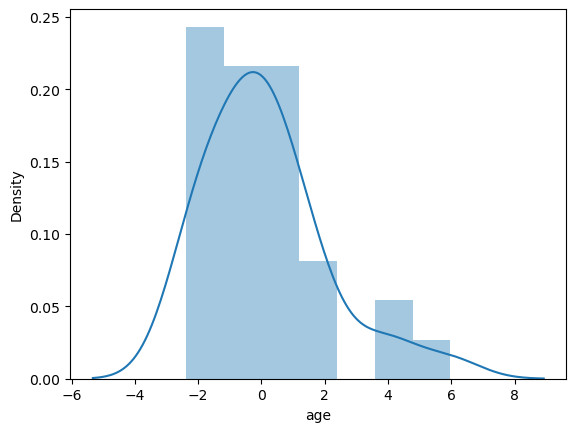

In [138]:
sns.distplot(y_test-y_pred)
plt.show()

In [139]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
y_pred = reg_rf.predict(X_test)

In [141]:
reg_rf.score(X_train, y_train)

0.877935978564506

In [142]:
reg_rf.score(X_test, y_test)

0.28137920599666855

In [143]:
r2_score(y_test, y_pred)

0.28137920599666855

In [144]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.2654838709677416
MSE: 2.6935193548387097
RMSE: 1.6411944902535804
